In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

In [13]:
import numpy as np

class MultinomialNaiveBayes():
    def __init__(self):
        self.prob_vec = {}
        self.classes  = []
        
    def fit(self,X,y):
        # extract the probabilities for each element for different classes
        self.classes = np.unique(y)
        occurences = np.where(X != 0, 1.0, 0.0)
        for c in self.classes:
            idx = np.where(y==c)[0]
            N = len(idx)
            
            self.prob_vec[c] = np.log(np.sum(occurences[idx,:],axis=0)/N+1e-10)
        
    def predict_proba(self,X):
        #Output matrix N_documents X N_classes
        probs = np.zeros((X.shape[0],len(self.classes)))
        i=0
        for k in self.classes:

            probs[:,i] = np.dot(X,self.prob_vec[k].T).ravel()
            i+=1
        return probs
    
    def predict(self,X):
        return self.classes[np.argmax(self.predict_proba(X),axis =1)]

### Mock problem

In [5]:
X=np.array([[1,2,3,0,0,0],[0,1,2,0,0,1],[0,0,0,2,3,1],[1,0,1,2,3,0]],dtype=np.float)
y = [0,0,1,1]

In [7]:
clf = BernoulliNaiveBayes()
clf.fit(X,y)

In [8]:
clf.classes

array([0, 1])

In [9]:
clf.prob_vec

{0: array([ -6.93147180e-01,   1.00000008e-10,   1.00000008e-10,
         -2.30258509e+01,  -2.30258509e+01,  -6.93147180e-01]),
 1: array([ -6.93147180e-01,  -2.30258509e+01,  -6.93147180e-01,
          1.00000008e-10,   1.00000008e-10,  -6.93147180e-01])}

In [10]:
clf.predict_proba(X)

array([[  -0.69314718,  -48.82429058],
       [  -0.69314718,  -25.10529247],
       [-115.82240183,   -0.69314718],
       [-115.82240183,   -1.38629436]])

In [11]:
clf.predict(X)

array([0, 0, 1, 1])

### NY Times dataset

In [4]:
#load data
import pandas as pd
data=pd.read_csv('../../files/Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')
data.head()

,Article_ID,Date,Article_Sequence,Title,Summary,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
0,1,1/1/1996,a,Nation's Smaller Jails Struggle To Cope With S...,Jails overwhelmed with hardened criminals,120500,1205,12,0,0,0,0,0,0,0,0,0,0
1,2,1/1/1996,b,Dancing (and Kissing) In the New Year,new years activities,280000,2800,28,0,0,0,0,0,0,0,0,0,0
2,3,1/1/1996,c,Forbes's Silver Bullet for the Nation's Malaise,Steve Forbes running for President,201201,2012,20,0,0,0,0,1,0,0,0,0,0
3,4,1/1/1996,d,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",U.S. military constructs bridge to help their ...,160200,1602,16,0,0,0,0,0,0,0,0,0,0
4,5,1/1/1996,e,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,Democrats and Republicans can't agree on plan ...,201206,2012,20,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np
#Let us train the classifier with data up to 1/1/2004 and test its performnace in data from 2004-2006
split = pd.to_datetime(pd.Series(data['Date']))<pd.datetime(2004, 1, 1)
raw_data = data['Title']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]
print ('Check the split sizes, train, test and total amount of data:')
print (raw_train.shape, raw_test.shape, raw_data.shape)
print ('Display the labels:')
print (np.unique(y))

Check the split sizes, train, test and total amount of data:
(23584,) (7450,) (31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29 30
 31 99]


In [6]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

# We use the count number of instances considering that a word has a minimum support of two documents
vectorizer = CountVectorizer(min_df=2, 
# stop words such as 'and', 'the', 'of' are removed                             
 stop_words='english', 
 strip_accents='unicode')

#example of the tokenization
test_string = raw_train[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n")


#Process and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print ("Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n")
print ("Extract of tokens:")
print (vectorizer.get_feature_names()[1000:1100])

Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates 

Preprocessed: nation's smaller jails struggle to cope with surge in inmates 

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates']

Number of tokens: 8950

Extract of tokens:
['boeing', 'boiling', 'boils', 'bold', 'bolster', 'bolsters', 'bolt', 'bolts', 'bomb', 'bombay', 'bombed', 'bomber', 'bombers', 'bombing', 'bombings', 'bombs', 'bonanza', 'bond', 'bondage', 'bonds', 'bone', 'bones', 'bonn', 'bono', 'bonus', 'bonuses', 'book', 'books', 'booksellers', 'bookstore', 'boom', 'boomers', 'booming', 'booms', 'boost', 'boot', 'bora', 'border', 'borders', 'born', 'borough', 'boroughs', 'borrow', 'borrowing', 'bosnia', 'bosnian', 'bosnians', 'boss', 'bosses', 'boston', 'botched', 'bottle', 'bought', 'bounce', 'bound', 'bounty', 'bout', 'bow', 'bowing', 'bowl', 'bows', 'box', 'boxes

In [7]:
X_train = X_train.todense()
X_train = X_train.astype(np.float)
X_test = X_test.todense()
X_test = X_test.astype(np.float)
y_train = np.array(y_train.tolist())

In [28]:
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9) 

### Our Multinomial NaiveBayes

classification accuracy: 0.43932885906
Classification Report:
             precision    recall  f1-score   support

          1       0.44      0.30      0.35       169
          2       0.24      0.31      0.27       220
          3       0.47      0.51      0.49       407
          4       0.07      0.10      0.08        21
          5       0.27      0.30      0.28       163
          6       0.30      0.36      0.32       166
          7       0.21      0.20      0.21        59
          8       0.14      0.22      0.17        46
         10       0.23      0.29      0.25        98
         12       0.45      0.32      0.38       601
         13       0.19      0.17      0.18        47
         14       0.10      0.25      0.14        56
         15       0.27      0.33      0.30       272
         16       0.54      0.51      0.52      1401
         17       0.25      0.37      0.30        95
         18       0.08      0.06      0.07        33
         19       0.63      0.47    

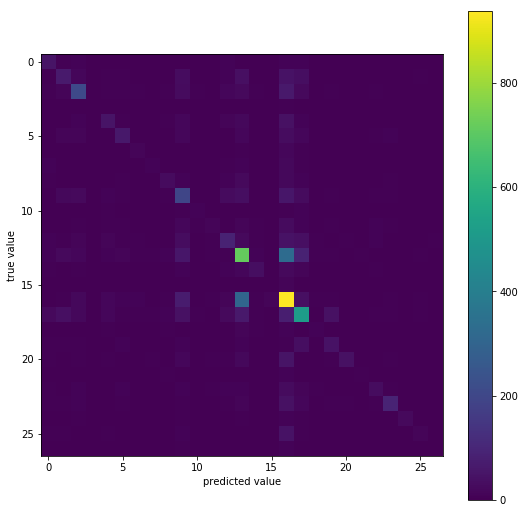

In [29]:
clf = MultinomialNaiveBayes()
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)

print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

### Result of sklearn Multinomial

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_hat_sklearn = nb.predict(X_test)  
    
print ("classification accuracy:", metrics.accuracy_score(y_hat_sklearn, y_test))
print ("Classification Report:")
print (metrics.classification_report(y_hat_sklearn,np.array(y_test)))
plot_confusion_matrix(y_hat, y_test)

classification accuracy: 0.53355704698
Classification Report:
             precision    recall  f1-score   support

          1       0.70      0.44      0.54       181
          2       0.26      0.58      0.36       124
          3       0.70      0.59      0.64       521
          4       0.07      0.67      0.12         3
          5       0.24      0.61      0.34        72
          6       0.64      0.66      0.65       190
          7       0.20      0.50      0.28        22
          8       0.28      0.77      0.41        26
         10       0.23      0.55      0.32        51
         12       0.56      0.39      0.46       629
         13       0.16      0.78      0.27         9
         14       0.11      0.84      0.20        19
         15       0.29      0.39      0.34       249
         16       0.62      0.57      0.60      1440
         17       0.31      0.63      0.42        70
         18       0.04      0.20      0.07         5
         19       0.69      0.50    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Comparison

Although our Multinomial naive bayes do not achieve the same result as the sklearn classifier, the confusion matrices has the same "distribution".

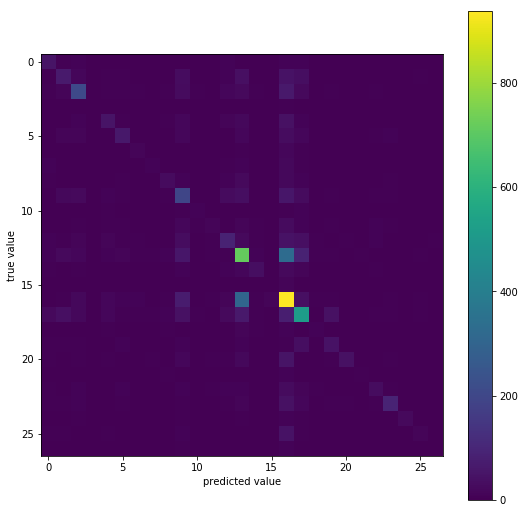

In [30]:
plot_confusion_matrix(y_hat, y_test)

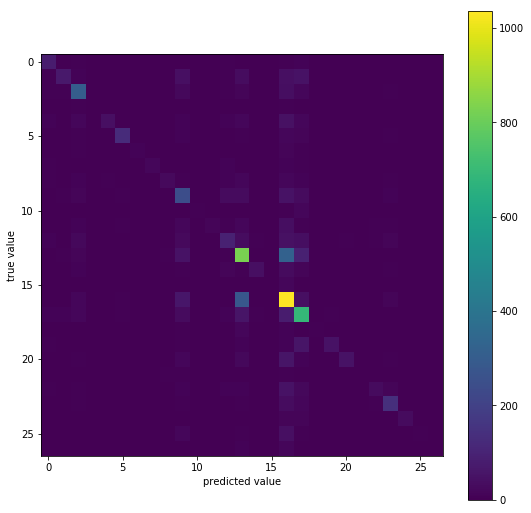

In [31]:
plot_confusion_matrix(y_hat_sklearn, y_test)